In [1]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_boston 
boston = load_boston()

In [5]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(boston.feature_names)
print(boston.data.shape)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


In [8]:
boston_pd = pd.DataFrame(boston.data)
boston_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_pd.columns = boston.feature_names
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_pd['PRICE'] = boston.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
corr_matrix = boston_pd.corr() 
corr_matrix['PRICE'].sort_values(ascending=True)

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

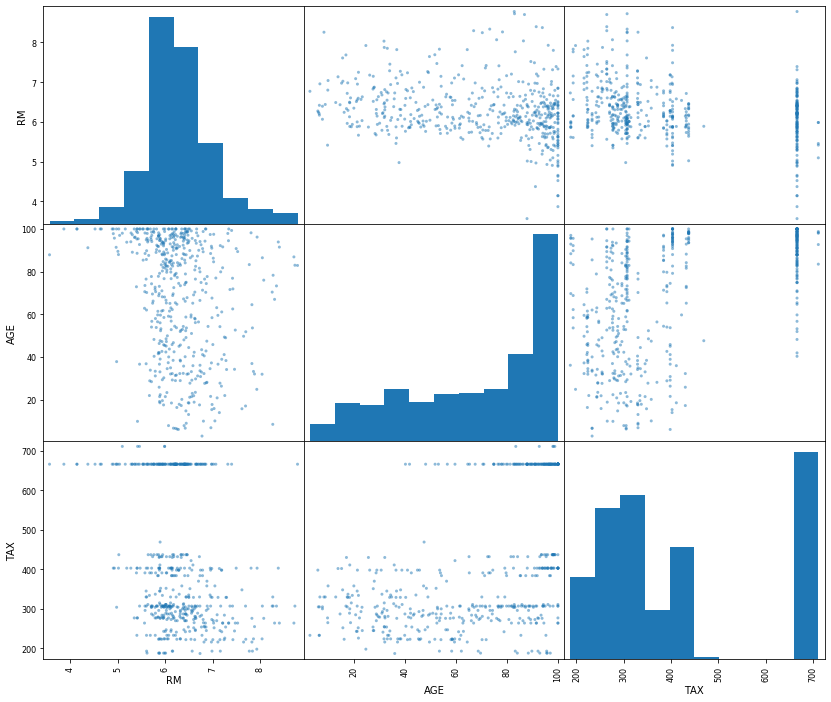

In [13]:
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
# attr = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'PRICE']
attr = ['RM', 'AGE', 'TAX']
scatter_matrix(boston_pd[attr], figsize=(14,12))
plt.show()

Text(0.5, 1.0, 'Relationship between RM and price')

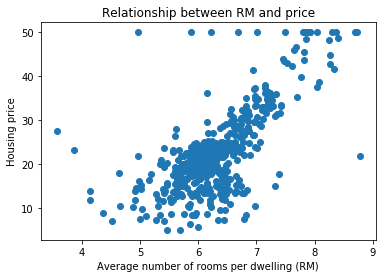

In [14]:
plt.scatter(boston_pd.RM, boston_pd.PRICE) 
plt.xlabel('Average number of rooms per dwelling (RM)') 
plt.ylabel('Housing price')
plt.title('Relationship between RM and price')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_pd.iloc[:,:-1],boston_pd.iloc[:,-1])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [16]:
from sklearn.linear_model import LinearRegression 
regression_model = LinearRegression()

In [17]:
regression_model.fit(X_train, y_train)
regression_model.score(X_train, y_train)

0.7227455174845667

In [18]:
print('Estimated intercept coefficients: ', regression_model.intercept_)
print('Number of coefficients: ', len(regression_model.coef_))
print('Coefficients: ', regression_model.coef_)

Estimated intercept coefficients:  32.70183394833427
Number of coefficients:  13
Coefficients:  [-3.72972276e-02  4.92071875e-02  7.73570409e-02  3.36660232e+00
 -1.72440348e+01  3.99036355e+00  1.01927083e-02 -1.31792108e+00
  2.93688332e-01 -1.24810916e-02 -8.85520669e-01  9.56610607e-03
 -6.01426332e-01]


In [19]:
pd.DataFrame(np.array((X_train.columns, regression_model.coef_)).T,columns=['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.0372972
1,ZN,0.0492072
2,INDUS,0.077357
3,CHAS,3.3666
4,NOX,-17.244
5,RM,3.99036
6,AGE,0.0101927
7,DIS,-1.31792
8,RAD,0.293688
9,TAX,-0.0124811


In [20]:
regression_model.predict(X_test)[0:5]

array([27.11593598, 34.28836151, 40.52127813, 34.04047891, 25.00395353])

In [21]:
y_test[0:5]

240    22.0
189    34.9
267    50.0
275    32.0
164    22.7
Name: PRICE, dtype: float64

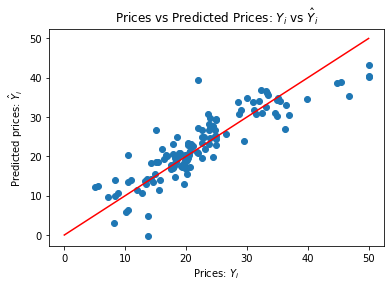

In [22]:
y_pred = regression_model.predict(X_test)
# plot prediction and actual data
plt.scatter(y_test, y_pred)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')
# plot a line, a perfect prediction would all fall on this line 
x = np.linspace(0, 50, 100)
y=x
plt.plot(x, y, 'r')

In [23]:
from sklearn.metrics import mean_absolute_error 
print(mean_absolute_error(y_test, y_pred))

3.2339749369178863


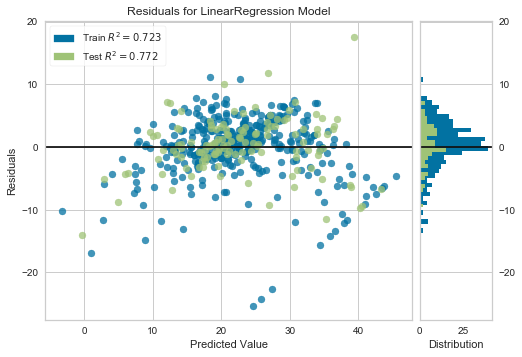

In [25]:
from yellowbrick.regressor import ResidualsPlot 
res_plot = ResidualsPlot(regression_model) 
res_plot.fit(X_train, y_train) 
res_plot.score(X_test, y_test)
res_plot.poof()

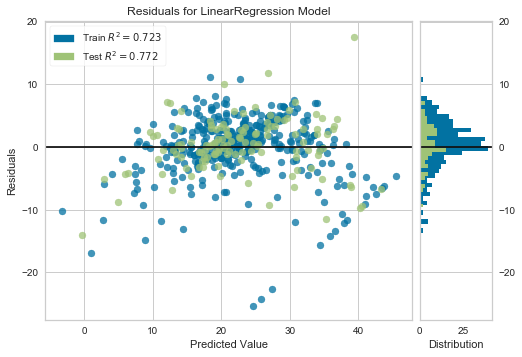

In [26]:
from yellowbrick.regressor import ResidualsPlot 
res_plot = ResidualsPlot(regression_model) 
res_plot.fit(X_train, y_train) 
res_plot.score(X_test, y_test)
res_plot.poof()